In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\gupt1\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


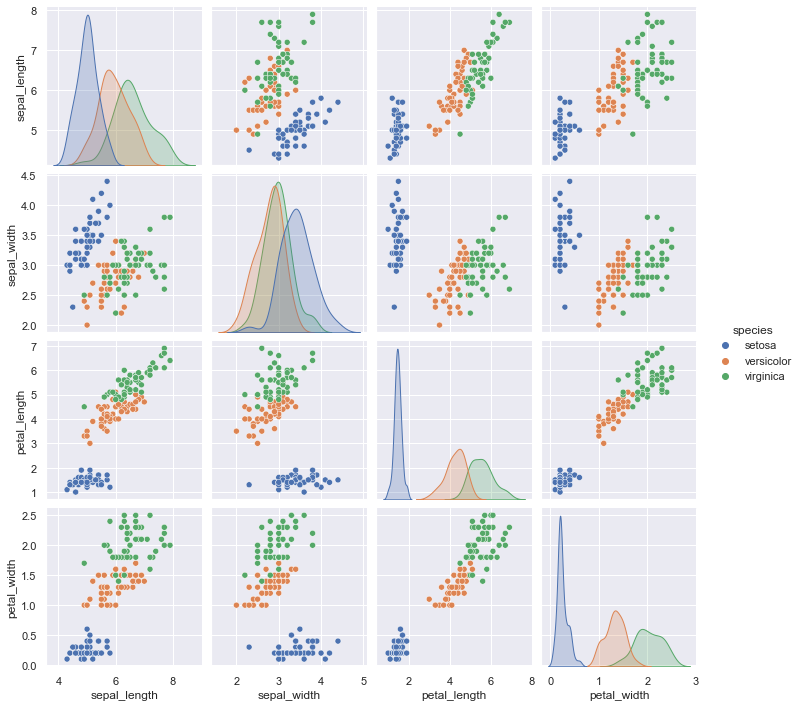

In [9]:
%matplotlib inline
sns.set()
sns.pairplot(iris, hue='species', size=2.5)

In [10]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [11]:
X_iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
y_iris = iris['species']
y_iris.shape

(150,)

In [13]:
y_iris

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

Most commonly, the steps in using the Scikit-Learn estimator API are as follows:

1) Choose a class of model by importing the appropriate estimator class from Scikit-Learn. \
2) Choose model hyperparameters by instantiating this class with desired values. \
3) Arrange data into a features matrix and target vector. \
4) Fit the model to your data by calling the fit() method of the model instance. \
5) Apply the Model to new data: \
   For supervised learning, often we predict labels for unknown data using the predict() method. \
   For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

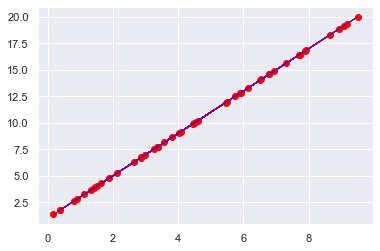

In [16]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(48)
x = 10*rng.rand(50)
y = 2*x + 1
plt.scatter(x,y, c='red', marker='o')
plt.plot(x,y, c='purple', lw=1)

In [17]:
x.shape

(50,)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression(fit_intercept = True)
model

LinearRegression()

In [23]:
# X = x.reshape(50,1)

In [24]:
# X.shape

In [25]:
X = x[:, np.newaxis]

In [26]:
X.shape

(50, 1)

In [27]:
model.fit(X,y)

LinearRegression()

In [28]:
model.coef_

array([2.])

In [29]:
model.intercept_

0.9999999999999982

In [30]:
xfit = np.linspace(-1,11)

In [31]:
Xfit = xfit[:,np.newaxis]
yfit = model.predict(Xfit)

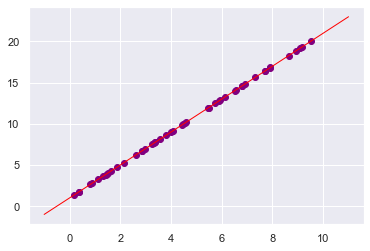

In [32]:
plt.scatter(x,y, c='purple')
plt.plot(xfit, yfit, lw=1, c='red')

## Supervised learning example

In [34]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [35]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_model)

0.9736842105263158

## Unsupervised learning example : iris dimensionality

In [37]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris)
X_2d = model.transform(X_iris)

C:\Users\gupt1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


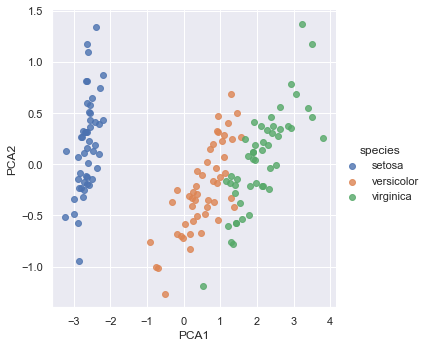

In [38]:
iris['PCA1'] = X_2d[:, 0]
iris['PCA2'] = X_2d[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

## unsupervised learning: iris clustering

In [40]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

C:\Users\gupt1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


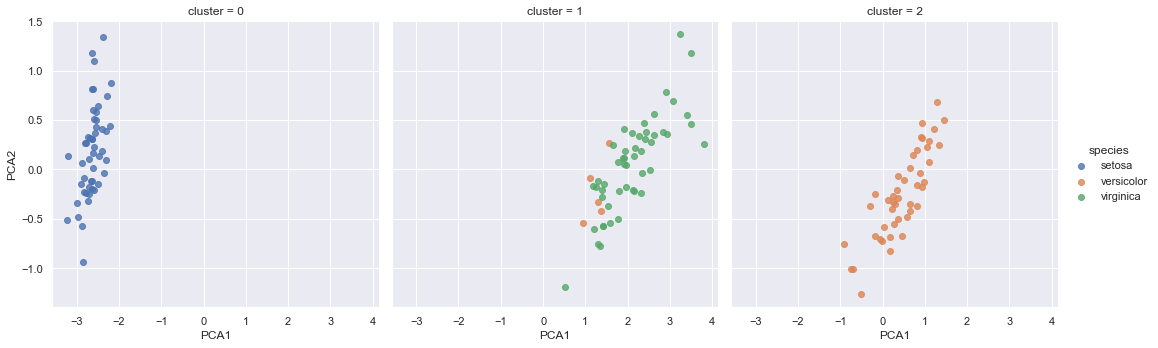

In [41]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False);

## Application: Exploring Hand-written Digits

In [42]:
from sklearn.datasets import load_digits
digits = load_digits()

In [46]:
digits.images.shape

(1797, 8, 8)

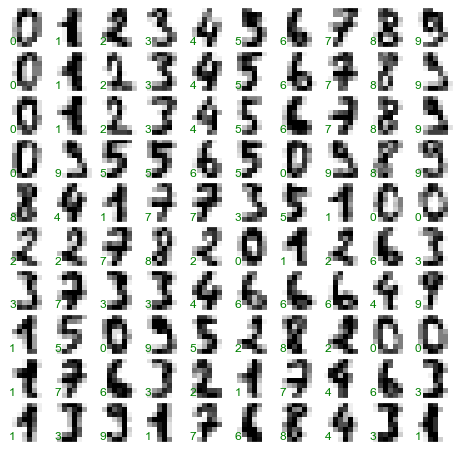

In [47]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [48]:
X = digits.data
X.shape

(1797, 64)

In [49]:
y = digits.target
y.shape

(1797,)

## Unsupervised learning: Dimensionality reduction

In [50]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

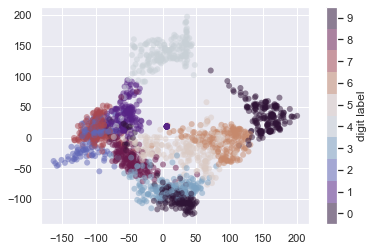

In [52]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('twilight_shifted', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

## Classification on digits

In [53]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

In [55]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain,ytrain)
y_model = model.predict(Xtest)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_model)

0.8533333333333334

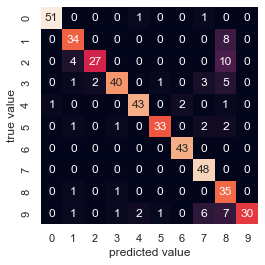

In [57]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest,y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

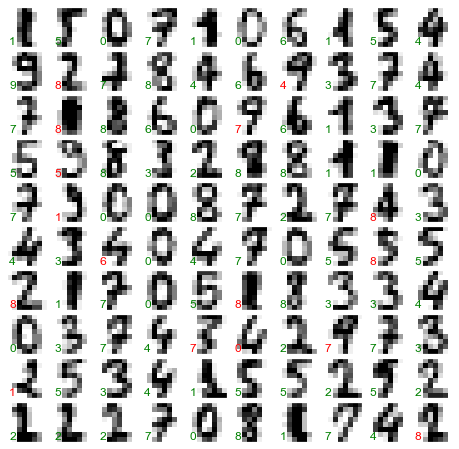

In [58]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')